# Titanic---- Yapay Sinir Ağları - Derin Öğrenme- Deep Learning ile hayatta kalanları tahmin etme

In [75]:
#Classification Örneği -DNN (deep neron network)

In [76]:
#!pip install tensorflow

In [77]:
import pandas as pd

In [78]:
df1=pd.read_csv("train.csv")

In [79]:
df2=pd.read_csv("test.csv")

In [80]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df1.shape

(891, 12)

In [82]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
Family        0
dtype: int64

In [83]:
# EDA - Exploratary Data Analysis

In [84]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [86]:
df1.shape,df2.shape

#df2 11 sütun var. df1 e göre 1 tane eksik. bziden bunu tahmin etmemiz isteniyor

((891, 12), (418, 11))

In [87]:
df=df1.append(df2)


#df=pd.concat([df1,df2])    gelecekte bu şekilde birleştirme yapılacakmış

C:\Users\user\AppData\Local\Temp\ipykernel_7052\539546556.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [88]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [89]:
# fillna boş olan veriyi doldurur

In [90]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean())

In [91]:
import matplotlib.pyplot as plt

In [92]:
import seaborn as sns

<Axes: xlabel='Embarked', ylabel='count'>

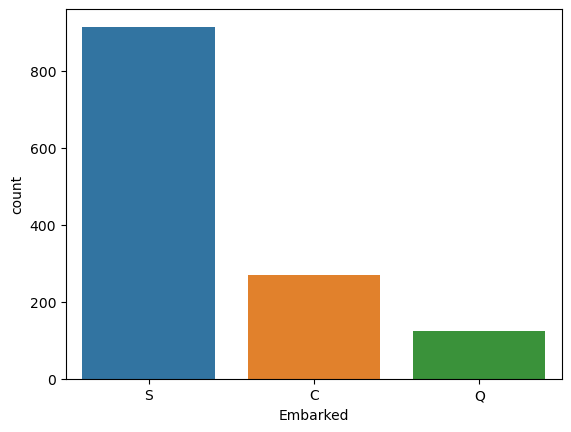

In [93]:
sns.countplot(x=df["Embarked"])

<Axes: xlabel='Embarked', ylabel='count'>

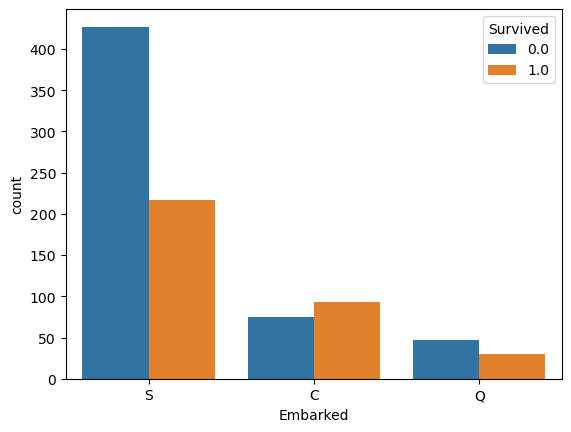

In [94]:
sns.countplot(x=df["Embarked"],hue=df["Survived"])

In [95]:
df["Embarked"]=df["Embarked"].fillna('S')
#df["Embarked"].fillna('S')

In [96]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [97]:
#del df['Cabin'] #bu kodu çalıştırdıktan sonra başına # koyduk. tekrar çalıştırırsak hata verir diye
df.drop('Cabin',axis=1,inplace=True) #axis=0 satır siliyor-axis=1 sütun siliyor

#inplace=True yazmazsak verinin kopyasını oluşturup orada siliyor

In [98]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [99]:
#Feature Engineering- öznitelik mühendisliği veride olmayıp sonradan üretilen sütunla

In [100]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=True) #ilk boşluğu buldu ve arasındaki harflari aldı

#string= metin yazı - sözel veri
#extract = çıkarma işlemini yapan

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [102]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [103]:
df["Title"]=df["Title"].replace(['Ms','Mlle'],'Miss')
df["Title"]=df["Title"].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df["Title"]=df["Title"].replace(['Rev','Jonkheer','Don','Sir','Major','Dr','Capt','Col'],'Mr')

In [104]:
del df['Name']

In [105]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [106]:
df["Age"]=df["Age"].fillna(df.groupby('Title')["Age"].transform('median'))
# transform = ortalamaları bulup gerekli yerkere doldurmak için
#boş olan yaş değerleri ortalamalarına göre doldur

In [107]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [108]:
df.drop(["PassengerId","Ticket"],axis=1,inplace=True)

#etkisi olmayan sütunları sildik

In [109]:
df["Family"]=df['SibSp']+df['Parch']+1

#aile diye yeni bir sütun tanımladık. aile ile kardeş sayısının toplamı+1

In [110]:
data=pd.get_dummies(df,drop_first=True)

#yazıları sayıya çevirdik
#df yerine data kullandık. df nin orjinali bozulmasın kalsın diye 

In [111]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [112]:
train=data[:891]
test=data[891:]

In [113]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [114]:
del test['Survived']

In [115]:
import tensorflow as tf

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [117]:
df.columns

#x ve y  farklı yöntemlerle yapılabilir

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Family'],
      dtype='object')

In [118]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [119]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [120]:
model=Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')


In [121]:
model.fit(x,y,epochs=1000,batch_size=32,verbose=1)  #verbose=0 olursa satırları göstermeden sonucu gösterir

Epoch 1/1000
28/28 [==============================] - 1s 2ms/step - loss: 0.9718 - accuracy: 0.5488
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.6162
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.6162
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6375
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.6554
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6678
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.6689
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6712
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6801
Epoch 10/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6857

28/28 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8294
Epoch 163/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8384
Epoch 164/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8294
Epoch 165/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8418
Epoch 166/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8485
Epoch 167/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8384
Epoch 168/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8339
Epoch 169/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8429
Epoch 170/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8429
Epoch 171/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8496
Epoch 323/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8451
Epoch 324/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8575
Epoch 325/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8429
Epoch 326/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8586
Epoch 327/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8519
Epoch 328/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8507
Epoch 329/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8608
Epoch 330/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8597
Epoch 331/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8676
Epoch 483/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8721
Epoch 484/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8844
Epoch 485/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8788
Epoch 486/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8732
Epoch 487/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8765
Epoch 488/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8765
Epoch 489/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8653
Epoch 490/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8765
Epoch 491/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.

28/28 [==============================] - 0s 3ms/step - loss: 0.2828 - accuracy: 0.8866
Epoch 643/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.2826 - accuracy: 0.8956
Epoch 644/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.8833
Epoch 645/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.8889
Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.8833
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.8900
Epoch 648/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8900
Epoch 649/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.8900
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.8956
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.9080
Epoch 803/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.9001
Epoch 804/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.9068
Epoch 805/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.9046
Epoch 806/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.9024
Epoch 807/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.9012
Epoch 808/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.9091
Epoch 809/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.8990
Epoch 810/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.9068
Epoch 811/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.9024
Epoch 963/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2411 - accuracy: 0.9068
Epoch 964/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.8979
Epoch 965/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.9024
Epoch 966/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9091
Epoch 967/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.9068
Epoch 968/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.9035
Epoch 969/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9057
Epoch 970/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9113
Epoch 971/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.

In [122]:
score=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.9091


In [123]:
import matplotlib.pyplot as plt

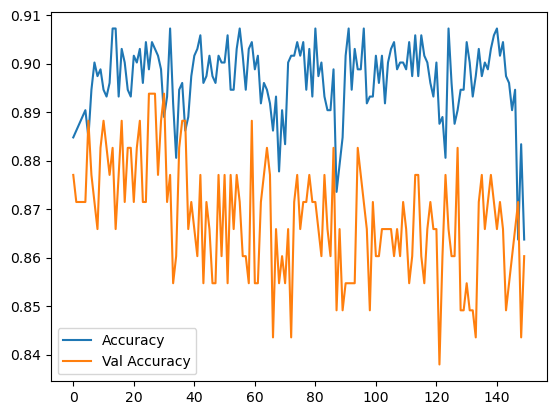

In [124]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()

In [125]:
model.fit(x,y,epochs=500,validation_split=.20,batch_size=32,verbose=1)

#validation_split=.20  bu kon train_test_spliti otomatk yapıyor

Epoch 1/500
23/23 [==============================] - 0s 6ms/step - loss: 0.2611 - accuracy: 0.9031 - val_loss: 0.1736 - val_accuracy: 0.9274
Epoch 2/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2676 - accuracy: 0.9045 - val_loss: 0.2136 - val_accuracy: 0.9106
Epoch 3/500
23/23 [==============================] - 0s 4ms/step - loss: 0.3074 - accuracy: 0.8848 - val_loss: 0.2283 - val_accuracy: 0.9218
Epoch 4/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.8778 - val_loss: 0.1908 - val_accuracy: 0.9218
Epoch 5/500
23/23 [==============================] - 0s 4ms/step - loss: 0.3111 - accuracy: 0.8750 - val_loss: 0.2550 - val_accuracy: 0.8939
Epoch 6/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2997 - accuracy: 0.8792 - val_loss: 0.2077 - val_accuracy: 0.9218
Epoch 7/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2869 - accuracy: 0.8848 - val_loss: 0.1844 - val_accuracy: 0.9218
Epoch 8/500
2

Epoch 59/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2530 - accuracy: 0.9017 - val_loss: 0.2458 - val_accuracy: 0.9106
Epoch 60/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2392 - accuracy: 0.9143 - val_loss: 0.2303 - val_accuracy: 0.9050
Epoch 61/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2377 - accuracy: 0.9143 - val_loss: 0.2418 - val_accuracy: 0.8994
Epoch 62/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9087 - val_loss: 0.2285 - val_accuracy: 0.9106
Epoch 63/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2432 - accuracy: 0.9073 - val_loss: 0.2255 - val_accuracy: 0.9106
Epoch 64/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2427 - accuracy: 0.9073 - val_loss: 0.2147 - val_accuracy: 0.9106
Epoch 65/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.9045 - val_loss: 0.2212 - val_accuracy: 0.9218
Epoch 

23/23 [==============================] - 0s 4ms/step - loss: 0.2215 - accuracy: 0.9157 - val_loss: 0.2647 - val_accuracy: 0.9218
Epoch 174/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2290 - accuracy: 0.9143 - val_loss: 0.2935 - val_accuracy: 0.8883
Epoch 175/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9157 - val_loss: 0.2890 - val_accuracy: 0.8994
Epoch 176/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2266 - accuracy: 0.9185 - val_loss: 0.2498 - val_accuracy: 0.9050
Epoch 177/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 0.9101 - val_loss: 0.2561 - val_accuracy: 0.9106
Epoch 178/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2341 - accuracy: 0.9185 - val_loss: 0.2796 - val_accuracy: 0.8994
Epoch 179/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2232 - accuracy: 0.9185 - val_loss: 0.2599 - val_accuracy: 0.9050
Epoch 180/500

23/23 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.9199 - val_loss: 0.3188 - val_accuracy: 0.9050
Epoch 288/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2165 - accuracy: 0.9199 - val_loss: 0.3251 - val_accuracy: 0.9106
Epoch 289/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9059 - val_loss: 0.3157 - val_accuracy: 0.9106
Epoch 290/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2352 - accuracy: 0.9115 - val_loss: 0.3113 - val_accuracy: 0.9106
Epoch 291/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9185 - val_loss: 0.3238 - val_accuracy: 0.8827
Epoch 292/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2195 - accuracy: 0.9213 - val_loss: 0.3316 - val_accuracy: 0.9106
Epoch 293/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2359 - accuracy: 0.9087 - val_loss: 0.3391 - val_accuracy: 0.8994
Epoch 294/500

23/23 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9101 - val_loss: 0.4409 - val_accuracy: 0.8715
Epoch 402/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2347 - accuracy: 0.9045 - val_loss: 0.4282 - val_accuracy: 0.8883
Epoch 403/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2365 - accuracy: 0.9101 - val_loss: 0.4253 - val_accuracy: 0.8827
Epoch 404/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2260 - accuracy: 0.9171 - val_loss: 0.4324 - val_accuracy: 0.8883
Epoch 405/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2203 - accuracy: 0.9157 - val_loss: 0.4201 - val_accuracy: 0.8994
Epoch 406/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2316 - accuracy: 0.9031 - val_loss: 0.4681 - val_accuracy: 0.8827
Epoch 407/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2288 - accuracy: 0.9143 - val_loss: 0.3952 - val_accuracy: 0.8883
Epoch 408/500

In [127]:
score=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.9136


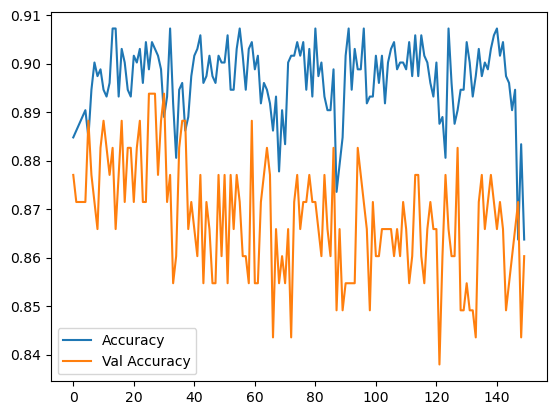

In [128]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()

In [129]:
history=model.fit(x,y,epochs=150,validation_split=.20,batch_size=32,verbose=1)

Epoch 1/150
23/23 [==============================] - 0s 5ms/step - loss: 0.2315 - accuracy: 0.9129 - val_loss: 0.4681 - val_accuracy: 0.8883
Epoch 2/150
23/23 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.9157 - val_loss: 0.4367 - val_accuracy: 0.8994
Epoch 3/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2281 - accuracy: 0.9171 - val_loss: 0.4292 - val_accuracy: 0.8827
Epoch 4/150
23/23 [==============================] - 0s 4ms/step - loss: 0.2284 - accuracy: 0.9101 - val_loss: 0.4349 - val_accuracy: 0.8827
Epoch 5/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.9129 - val_loss: 0.4555 - val_accuracy: 0.8939
Epoch 6/150
23/23 [==============================] - 0s 4ms/step - loss: 0.2404 - accuracy: 0.9129 - val_loss: 0.4809 - val_accuracy: 0.8771
Epoch 7/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2373 - accuracy: 0.9213 - val_loss: 0.4342 - val_accuracy: 0.8659
Epoch 8/150
2

Epoch 59/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2228 - accuracy: 0.9242 - val_loss: 0.5411 - val_accuracy: 0.8659
Epoch 60/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.9185 - val_loss: 0.5205 - val_accuracy: 0.8715
Epoch 61/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9228 - val_loss: 0.5211 - val_accuracy: 0.8827
Epoch 62/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.9199 - val_loss: 0.5460 - val_accuracy: 0.8715
Epoch 63/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.9157 - val_loss: 0.5188 - val_accuracy: 0.8883
Epoch 64/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.9171 - val_loss: 0.5133 - val_accuracy: 0.8715
Epoch 65/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.9171 - val_loss: 0.5175 - val_accuracy: 0.8883
Epoch 

In [130]:
score=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.9024


In [131]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 104       
                                                                 
 dense_19 (Dense)            (None, 120)               1080      
                                                                 
 dense_20 (Dense)            (None, 64)                7744      
                                                                 
 dense_21 (Dense)            (None, 6)                 390       
                                                                 
 dense_22 (Dense)            (None, 2)                 14        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9335 (36.46 KB)
Trainable params: 9335 (

In [132]:
import matplotlib.pyplot as plt

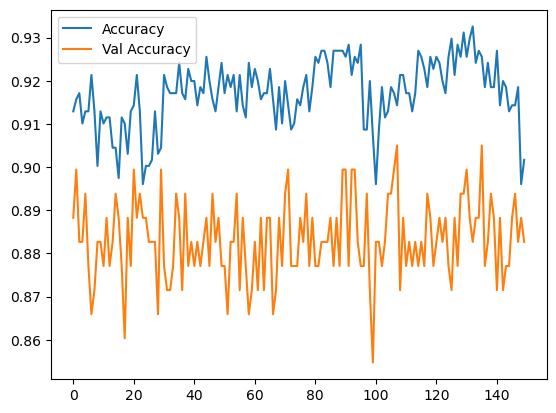

In [133]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()


In [134]:
score=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.9024


In [135]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [136]:
model.fit(x,y,epochs=1000,batch_size=32,verbose=1)  #verbose=0 olursa satırları göstermeden sonucu gösterir

Epoch 1/1000
28/28 [==============================] - 1s 3ms/step - loss: 0.6560 - accuracy: 0.6723
Epoch 2/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.6869
Epoch 3/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.7026
Epoch 4/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.7183
Epoch 5/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.7205
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7576
Epoch 7/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7778
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7699
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7688
Epoch 10/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.7957

28/28 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8664
Epoch 163/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8676
Epoch 164/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.8709
Epoch 165/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8732
Epoch 166/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8664
Epoch 167/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.3041 - accuracy: 0.8709
Epoch 168/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.2969 - accuracy: 0.8777
Epoch 169/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8743
Epoch 170/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8698
Epoch 171/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.

28/28 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.9158
Epoch 323/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9181
Epoch 324/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9169
Epoch 325/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9057
Epoch 326/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9203
Epoch 327/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9237
Epoch 328/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.1966 - accuracy: 0.9259
Epoch 329/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9136
Epoch 330/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9203
Epoch 331/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9214
Epoch 483/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9349
Epoch 484/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9360
Epoch 485/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9338
Epoch 486/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9315
Epoch 487/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1643 - accuracy: 0.9327
Epoch 488/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9383
Epoch 489/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9259
Epoch 490/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9136
Epoch 491/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9259
Epoch 643/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1533 - accuracy: 0.9416
Epoch 644/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.9270
Epoch 645/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9293
Epoch 646/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9315
Epoch 647/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9214
Epoch 648/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9113
Epoch 649/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9113
Epoch 650/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9147
Epoch 651/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9315
Epoch 803/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9315
Epoch 804/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1820 - accuracy: 0.9214
Epoch 805/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9304
Epoch 806/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9282
Epoch 807/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1464 - accuracy: 0.9461
Epoch 808/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9428
Epoch 809/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.1431 - accuracy: 0.9394
Epoch 810/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9327
Epoch 811/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.1505 - accuracy: 0.

28/28 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9214
Epoch 963/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9270
Epoch 964/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9405
Epoch 965/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9416
Epoch 966/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1366 - accuracy: 0.9439
Epoch 967/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9439
Epoch 968/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.9428
Epoch 969/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1311 - accuracy: 0.9450
Epoch 970/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9461
Epoch 971/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.

In [137]:
score=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9450


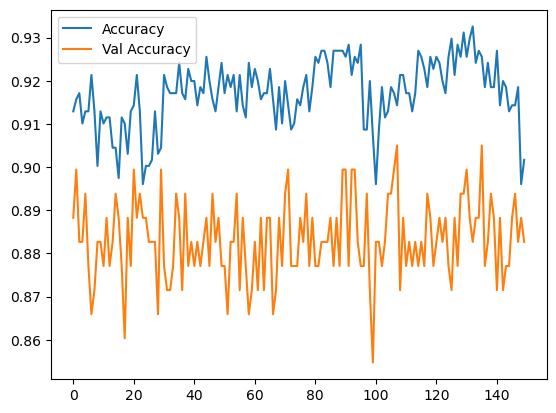

In [138]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()